In [1]:
import pandas as pd
import torch
from NLPUtils import *
import re
import fasttext

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

In [2]:
with open('./lm_files/lm_l40_bigram_train_test', 'rb') as file:
    lines = file.readlines()
    lm_file = [line.decode('iso-8859-1') for line in lines]

In [3]:
# Obtenemos el corpus de entrenamiento:
with open('trainLM2.txt', 'rb') as file:
    lines = file.readlines()
    corpus = [['<s>'] + line.decode('iso-8859-1').split(' ')[:-1] + ['</s>'] for line in lines]
    
corpus = [[token for doc in corpus for token in doc]]

In [7]:
# Entrenamos:

window_size = 2           # Tamaño de la ventana del contexto.
cutoff_freq = 0           # Palabras con una frecuencia menor o igual a cutoff_freq son excluídas del vocabulario.
batch_size = 512          # Tamaño del batch.

model = 'CBOW'            # Método de entrenamiento.
embedding_dim = 200       # Dimensión del espacio de los word vectors.
device = 'cuda:1'         # Dispositivo sobre el cual se entrena. 
state_dict = None         # Parámetros pre-entrenados.
paralelize = False        # Flag para decirle al programa que use las 2 gpus

trainer = Word2vecTrainer(corpus,cutoff_freq=cutoff_freq,window_size=window_size,batch_size=batch_size)
trainer.InitModel(model=model, state_dict=state_dict, device=device, paralelize=paralelize, embedding_dim=embedding_dim)

Word2vec trainer created:
Window size: 2
Number of samples: 48612
Vocabulary Size: 5924
Number of batches: 95
Number of samples per batch: 512

Dispositivo seleccionado: cuda:1
Dimensión del espacio de los embeddings: 200
Starting training...
Optimization method: Adam
Learning Rate: 0.0005
Number of epochs: 150
Running on device (cuda:1)

Epoch: 1, Batch number: 0, Loss: 4481.419921875
Epoch: 1, Batch number: 10, Loss: 4398.90380859375
Epoch: 1, Batch number: 20, Loss: 4332.87255859375
Epoch: 1, Batch number: 30, Loss: 4261.369140625
Epoch: 1, Batch number: 40, Loss: 4223.4384765625
Epoch: 1, Batch number: 50, Loss: 4184.0712890625
Epoch: 1, Batch number: 60, Loss: 4089.766357421875
Epoch: 1, Batch number: 70, Loss: 4044.928466796875
Epoch: 1, Batch number: 80, Loss: 3926.794677734375
Epoch: 1, Batch number: 90, Loss: 3919.951416015625
Epoch: 2, Batch number: 5, Loss: 3797.621826171875
Epoch: 2, Batch number: 15, Loss: 3762.408447265625
Epoch: 2, Batch number: 25, Loss: 3662.3051757812

Epoch: 17, Batch number: 20, Loss: 1666.8836669921875
Epoch: 17, Batch number: 30, Loss: 1608.8472900390625
Epoch: 17, Batch number: 40, Loss: 1664.707275390625
Epoch: 17, Batch number: 50, Loss: 1709.962646484375
Epoch: 17, Batch number: 60, Loss: 1697.89013671875
Epoch: 17, Batch number: 70, Loss: 1663.6888427734375
Epoch: 17, Batch number: 80, Loss: 1692.8197021484375
Epoch: 17, Batch number: 90, Loss: 1714.5582275390625
Epoch: 18, Batch number: 5, Loss: 1601.245849609375
Epoch: 18, Batch number: 15, Loss: 1572.0306396484375
Epoch: 18, Batch number: 25, Loss: 1599.45947265625
Epoch: 18, Batch number: 35, Loss: 1614.9327392578125
Epoch: 18, Batch number: 45, Loss: 1590.056396484375
Epoch: 18, Batch number: 55, Loss: 1596.841064453125
Epoch: 18, Batch number: 65, Loss: 1601.8326416015625
Epoch: 18, Batch number: 75, Loss: 1634.8297119140625
Epoch: 18, Batch number: 85, Loss: 1564.9439697265625
Epoch: 19, Batch number: 0, Loss: 1529.739013671875
Epoch: 19, Batch number: 10, Loss: 1548.

Epoch: 33, Batch number: 60, Loss: 979.3488159179688
Epoch: 33, Batch number: 70, Loss: 975.594482421875
Epoch: 33, Batch number: 80, Loss: 971.830078125
Epoch: 33, Batch number: 90, Loss: 949.1182861328125
Epoch: 34, Batch number: 5, Loss: 913.739501953125
Epoch: 34, Batch number: 15, Loss: 976.4524536132812
Epoch: 34, Batch number: 25, Loss: 898.6556396484375
Epoch: 34, Batch number: 35, Loss: 870.7490234375
Epoch: 34, Batch number: 45, Loss: 874.5230102539062
Epoch: 34, Batch number: 55, Loss: 1005.0233154296875
Epoch: 34, Batch number: 65, Loss: 887.2300415039062
Epoch: 34, Batch number: 75, Loss: 972.0214233398438
Epoch: 34, Batch number: 85, Loss: 896.2972412109375
Epoch: 35, Batch number: 0, Loss: 891.077392578125
Epoch: 35, Batch number: 10, Loss: 869.8419799804688
Epoch: 35, Batch number: 20, Loss: 914.8162841796875
Epoch: 35, Batch number: 30, Loss: 941.7435302734375
Epoch: 35, Batch number: 40, Loss: 884.0603637695312
Epoch: 35, Batch number: 50, Loss: 998.3129272460938
Epoc

Epoch: 50, Batch number: 45, Loss: 577.988525390625
Epoch: 50, Batch number: 55, Loss: 590.8583374023438
Epoch: 50, Batch number: 65, Loss: 547.5751953125
Epoch: 50, Batch number: 75, Loss: 582.8978881835938
Epoch: 50, Batch number: 85, Loss: 575.1235961914062
Epoch: 51, Batch number: 0, Loss: 561.315185546875
Epoch: 51, Batch number: 10, Loss: 602.1956787109375
Epoch: 51, Batch number: 20, Loss: 577.37109375
Epoch: 51, Batch number: 30, Loss: 572.1970825195312
Epoch: 51, Batch number: 40, Loss: 564.72412109375
Epoch: 51, Batch number: 50, Loss: 577.7670288085938
Epoch: 51, Batch number: 60, Loss: 583.185791015625
Epoch: 51, Batch number: 70, Loss: 515.0237426757812
Epoch: 51, Batch number: 80, Loss: 568.6336669921875
Epoch: 51, Batch number: 90, Loss: 560.7835693359375
Epoch: 52, Batch number: 5, Loss: 532.6783447265625
Epoch: 52, Batch number: 15, Loss: 538.6820678710938
Epoch: 52, Batch number: 25, Loss: 533.0043334960938
Epoch: 52, Batch number: 35, Loss: 556.1841430664062
Epoch: 5

Epoch: 66, Batch number: 85, Loss: 386.27117919921875
Epoch: 67, Batch number: 0, Loss: 391.04107666015625
Epoch: 67, Batch number: 10, Loss: 350.91021728515625
Epoch: 67, Batch number: 20, Loss: 372.9813232421875
Epoch: 67, Batch number: 30, Loss: 374.31158447265625
Epoch: 67, Batch number: 40, Loss: 345.84112548828125
Epoch: 67, Batch number: 50, Loss: 431.81610107421875
Epoch: 67, Batch number: 60, Loss: 353.1802062988281
Epoch: 67, Batch number: 70, Loss: 380.1958312988281
Epoch: 67, Batch number: 80, Loss: 350.453125
Epoch: 67, Batch number: 90, Loss: 455.15887451171875
Epoch: 68, Batch number: 5, Loss: 345.751708984375
Epoch: 68, Batch number: 15, Loss: 362.1111145019531
Epoch: 68, Batch number: 25, Loss: 374.6903381347656
Epoch: 68, Batch number: 35, Loss: 299.5086669921875
Epoch: 68, Batch number: 45, Loss: 328.2945861816406
Epoch: 68, Batch number: 55, Loss: 360.73455810546875
Epoch: 68, Batch number: 65, Loss: 327.5744323730469
Epoch: 68, Batch number: 75, Loss: 365.408721923

Epoch: 83, Batch number: 50, Loss: 279.92706298828125
Epoch: 83, Batch number: 60, Loss: 250.68316650390625
Epoch: 83, Batch number: 70, Loss: 245.483154296875
Epoch: 83, Batch number: 80, Loss: 247.55731201171875
Epoch: 83, Batch number: 90, Loss: 292.1928405761719
Epoch: 84, Batch number: 5, Loss: 279.5982360839844
Epoch: 84, Batch number: 15, Loss: 277.6109924316406
Epoch: 84, Batch number: 25, Loss: 276.2652282714844
Epoch: 84, Batch number: 35, Loss: 294.0586242675781
Epoch: 84, Batch number: 45, Loss: 259.1260070800781
Epoch: 84, Batch number: 55, Loss: 251.5785369873047
Epoch: 84, Batch number: 65, Loss: 209.0087432861328
Epoch: 84, Batch number: 75, Loss: 231.0155487060547
Epoch: 84, Batch number: 85, Loss: 204.29286193847656
Epoch: 85, Batch number: 0, Loss: 240.9610595703125
Epoch: 85, Batch number: 10, Loss: 244.1203155517578
Epoch: 85, Batch number: 20, Loss: 245.85263061523438
Epoch: 85, Batch number: 30, Loss: 228.01197814941406
Epoch: 85, Batch number: 40, Loss: 244.8115

Epoch: 99, Batch number: 70, Loss: 177.03170776367188
Epoch: 99, Batch number: 80, Loss: 179.03662109375
Epoch: 99, Batch number: 90, Loss: 189.9117889404297
Epoch: 100, Batch number: 5, Loss: 162.3243408203125
Epoch: 100, Batch number: 15, Loss: 174.95533752441406
Epoch: 100, Batch number: 25, Loss: 162.7518768310547
Epoch: 100, Batch number: 35, Loss: 219.35287475585938
Epoch: 100, Batch number: 45, Loss: 170.97677612304688
Epoch: 100, Batch number: 55, Loss: 180.15280151367188
Epoch: 100, Batch number: 65, Loss: 174.03427124023438
Epoch: 100, Batch number: 75, Loss: 183.55638122558594
Epoch: 100, Batch number: 85, Loss: 182.4425048828125
Epoch: 101, Batch number: 0, Loss: 184.43185424804688
Epoch: 101, Batch number: 10, Loss: 168.0742645263672
Epoch: 101, Batch number: 20, Loss: 208.41555786132812
Epoch: 101, Batch number: 30, Loss: 201.6700897216797
Epoch: 101, Batch number: 40, Loss: 172.63131713867188
Epoch: 101, Batch number: 50, Loss: 185.78123474121094
Epoch: 101, Batch number

Epoch: 115, Batch number: 90, Loss: 147.38934326171875
Epoch: 116, Batch number: 5, Loss: 125.87702178955078
Epoch: 116, Batch number: 15, Loss: 114.67236328125
Epoch: 116, Batch number: 25, Loss: 150.02928161621094
Epoch: 116, Batch number: 35, Loss: 122.18453979492188
Epoch: 116, Batch number: 45, Loss: 135.93563842773438
Epoch: 116, Batch number: 55, Loss: 136.51597595214844
Epoch: 116, Batch number: 65, Loss: 177.81362915039062
Epoch: 116, Batch number: 75, Loss: 161.4140625
Epoch: 116, Batch number: 85, Loss: 152.45297241210938
Epoch: 117, Batch number: 0, Loss: 138.03213500976562
Epoch: 117, Batch number: 10, Loss: 128.93045043945312
Epoch: 117, Batch number: 20, Loss: 157.71072387695312
Epoch: 117, Batch number: 30, Loss: 135.59432983398438
Epoch: 117, Batch number: 40, Loss: 130.15631103515625
Epoch: 117, Batch number: 50, Loss: 124.72649383544922
Epoch: 117, Batch number: 60, Loss: 136.12884521484375
Epoch: 117, Batch number: 70, Loss: 122.80330657958984
Epoch: 117, Batch numb

Epoch: 131, Batch number: 80, Loss: 127.43476867675781
Epoch: 131, Batch number: 90, Loss: 126.59567260742188
Epoch: 132, Batch number: 5, Loss: 114.57534790039062
Epoch: 132, Batch number: 15, Loss: 94.42430114746094
Epoch: 132, Batch number: 25, Loss: 98.76695251464844
Epoch: 132, Batch number: 35, Loss: 127.63948059082031
Epoch: 132, Batch number: 45, Loss: 118.9023208618164
Epoch: 132, Batch number: 55, Loss: 115.8570556640625
Epoch: 132, Batch number: 65, Loss: 111.89317321777344
Epoch: 132, Batch number: 75, Loss: 146.99119567871094
Epoch: 132, Batch number: 85, Loss: 125.3924560546875
Epoch: 133, Batch number: 0, Loss: 99.56885528564453
Epoch: 133, Batch number: 10, Loss: 99.85383605957031
Epoch: 133, Batch number: 20, Loss: 94.50347900390625
Epoch: 133, Batch number: 30, Loss: 118.0601806640625
Epoch: 133, Batch number: 40, Loss: 84.2557373046875
Epoch: 133, Batch number: 50, Loss: 132.43971252441406
Epoch: 133, Batch number: 60, Loss: 115.188720703125
Epoch: 133, Batch number:

Epoch: 147, Batch number: 90, Loss: 117.02488708496094
Epoch: 148, Batch number: 5, Loss: 80.59514617919922
Epoch: 148, Batch number: 15, Loss: 96.38876342773438
Epoch: 148, Batch number: 25, Loss: 102.18623352050781
Epoch: 148, Batch number: 35, Loss: 84.48875427246094
Epoch: 148, Batch number: 45, Loss: 71.03653717041016
Epoch: 148, Batch number: 55, Loss: 90.73805236816406
Epoch: 148, Batch number: 65, Loss: 86.6068115234375
Epoch: 148, Batch number: 75, Loss: 97.34827423095703
Epoch: 148, Batch number: 85, Loss: 78.01703643798828
Epoch: 149, Batch number: 0, Loss: 103.14219665527344
Epoch: 149, Batch number: 10, Loss: 102.76763153076172
Epoch: 149, Batch number: 20, Loss: 90.27376556396484
Epoch: 149, Batch number: 30, Loss: 81.4084243774414
Epoch: 149, Batch number: 40, Loss: 107.82283020019531
Epoch: 149, Batch number: 50, Loss: 103.40794372558594
Epoch: 149, Batch number: 60, Loss: 92.10921478271484
Epoch: 149, Batch number: 70, Loss: 93.35690307617188
Epoch: 149, Batch number: 

In [9]:
epochs = 150              # Cantidad de epochs
learning_rate = 5e-5      # Tasa de aprendizaje
sample_loss_every = 10    # Calcular la loss cada este número
algorithm = 'Adam'        # Algoritmo de optimización

trainer.Train(algorithm=algorithm, epochs=epochs, sample_loss_every=sample_loss_every, lr=learning_rate)

Resuming training...
Optimization method: Adam
Learning Rate: 5e-05
Number of epochs: 150
Running on device (cuda:1)

Epoch: 1, Batch number: 0, Loss: 66.24236297607422
Epoch: 1, Batch number: 10, Loss: 101.70799255371094
Epoch: 1, Batch number: 20, Loss: 94.98567962646484
Epoch: 1, Batch number: 30, Loss: 99.78288269042969
Epoch: 1, Batch number: 40, Loss: 97.64937591552734
Epoch: 1, Batch number: 50, Loss: 107.68511199951172
Epoch: 1, Batch number: 60, Loss: 74.23890686035156
Epoch: 1, Batch number: 70, Loss: 92.66578674316406
Epoch: 1, Batch number: 80, Loss: 97.53971862792969
Epoch: 1, Batch number: 90, Loss: 88.74398803710938
Epoch: 2, Batch number: 5, Loss: 67.59140014648438
Epoch: 2, Batch number: 15, Loss: 94.34934997558594
Epoch: 2, Batch number: 25, Loss: 110.85012817382812
Epoch: 2, Batch number: 35, Loss: 91.55830383300781
Epoch: 2, Batch number: 45, Loss: 90.45902252197266
Epoch: 2, Batch number: 55, Loss: 79.17151641845703
Epoch: 2, Batch number: 65, Loss: 116.04524993896

Epoch: 17, Batch number: 30, Loss: 94.51021575927734
Epoch: 17, Batch number: 40, Loss: 63.7860221862793
Epoch: 17, Batch number: 50, Loss: 106.34960174560547
Epoch: 17, Batch number: 60, Loss: 79.8295669555664
Epoch: 17, Batch number: 70, Loss: 83.40621948242188
Epoch: 17, Batch number: 80, Loss: 88.38886260986328
Epoch: 17, Batch number: 90, Loss: 87.67735290527344
Epoch: 18, Batch number: 5, Loss: 74.39984893798828
Epoch: 18, Batch number: 15, Loss: 109.98320007324219
Epoch: 18, Batch number: 25, Loss: 101.43897247314453
Epoch: 18, Batch number: 35, Loss: 106.14339447021484
Epoch: 18, Batch number: 45, Loss: 79.77194213867188
Epoch: 18, Batch number: 55, Loss: 81.88912200927734
Epoch: 18, Batch number: 65, Loss: 87.53842163085938
Epoch: 18, Batch number: 75, Loss: 74.71806335449219
Epoch: 18, Batch number: 85, Loss: 94.2664794921875
Epoch: 19, Batch number: 0, Loss: 86.07586669921875
Epoch: 19, Batch number: 10, Loss: 119.21308135986328
Epoch: 19, Batch number: 20, Loss: 105.8717956

Epoch: 33, Batch number: 60, Loss: 83.43301391601562
Epoch: 33, Batch number: 70, Loss: 83.62295532226562
Epoch: 33, Batch number: 80, Loss: 83.70841979980469
Epoch: 33, Batch number: 90, Loss: 73.794677734375
Epoch: 34, Batch number: 5, Loss: 76.89804077148438
Epoch: 34, Batch number: 15, Loss: 90.53467559814453
Epoch: 34, Batch number: 25, Loss: 82.55679321289062
Epoch: 34, Batch number: 35, Loss: 93.77931213378906
Epoch: 34, Batch number: 45, Loss: 84.83267211914062
Epoch: 34, Batch number: 55, Loss: 104.9332046508789
Epoch: 34, Batch number: 65, Loss: 112.92799377441406
Epoch: 34, Batch number: 75, Loss: 93.7670669555664
Epoch: 34, Batch number: 85, Loss: 105.86275482177734
Epoch: 35, Batch number: 0, Loss: 80.53984832763672
Epoch: 35, Batch number: 10, Loss: 94.37034606933594
Epoch: 35, Batch number: 20, Loss: 88.59504699707031
Epoch: 35, Batch number: 30, Loss: 105.31785583496094
Epoch: 35, Batch number: 40, Loss: 80.61067199707031
Epoch: 35, Batch number: 50, Loss: 82.9195175170

Epoch: 50, Batch number: 25, Loss: 79.6389389038086
Epoch: 50, Batch number: 35, Loss: 84.31494903564453
Epoch: 50, Batch number: 45, Loss: 106.4228286743164
Epoch: 50, Batch number: 55, Loss: 99.58811950683594
Epoch: 50, Batch number: 65, Loss: 89.85527038574219
Epoch: 50, Batch number: 75, Loss: 80.50574493408203
Epoch: 50, Batch number: 85, Loss: 78.30174255371094
Epoch: 51, Batch number: 0, Loss: 62.8902473449707
Epoch: 51, Batch number: 10, Loss: 78.8075942993164
Epoch: 51, Batch number: 20, Loss: 80.14518737792969
Epoch: 51, Batch number: 30, Loss: 92.27941131591797
Epoch: 51, Batch number: 40, Loss: 113.03939819335938
Epoch: 51, Batch number: 50, Loss: 113.611328125
Epoch: 51, Batch number: 60, Loss: 91.99050903320312
Epoch: 51, Batch number: 70, Loss: 92.78314208984375
Epoch: 51, Batch number: 80, Loss: 94.01276397705078
Epoch: 51, Batch number: 90, Loss: 83.09080505371094
Epoch: 52, Batch number: 5, Loss: 94.63990783691406
Epoch: 52, Batch number: 15, Loss: 87.8929443359375
Ep

Epoch: 66, Batch number: 65, Loss: 99.34105682373047
Epoch: 66, Batch number: 75, Loss: 93.55609130859375
Epoch: 66, Batch number: 85, Loss: 90.90348052978516
Epoch: 67, Batch number: 0, Loss: 63.45293045043945
Epoch: 67, Batch number: 10, Loss: 84.65087890625
Epoch: 67, Batch number: 20, Loss: 94.57357025146484
Epoch: 67, Batch number: 30, Loss: 112.76271057128906
Epoch: 67, Batch number: 40, Loss: 75.66634368896484
Epoch: 67, Batch number: 50, Loss: 84.82411193847656
Epoch: 67, Batch number: 60, Loss: 75.70181274414062
Epoch: 67, Batch number: 70, Loss: 84.73512268066406
Epoch: 67, Batch number: 80, Loss: 77.31019592285156
Epoch: 67, Batch number: 90, Loss: 79.83334350585938
Epoch: 68, Batch number: 5, Loss: 81.56379699707031
Epoch: 68, Batch number: 15, Loss: 89.02253723144531
Epoch: 68, Batch number: 25, Loss: 76.89773559570312
Epoch: 68, Batch number: 35, Loss: 86.28173065185547
Epoch: 68, Batch number: 45, Loss: 97.23213958740234
Epoch: 68, Batch number: 55, Loss: 91.369361877441

Epoch: 83, Batch number: 10, Loss: 83.47782897949219
Epoch: 83, Batch number: 20, Loss: 77.08331298828125
Epoch: 83, Batch number: 30, Loss: 80.83663940429688
Epoch: 83, Batch number: 40, Loss: 89.5784683227539
Epoch: 83, Batch number: 50, Loss: 79.67610168457031
Epoch: 83, Batch number: 60, Loss: 97.32134246826172
Epoch: 83, Batch number: 70, Loss: 69.21898651123047
Epoch: 83, Batch number: 80, Loss: 92.60472869873047
Epoch: 83, Batch number: 90, Loss: 74.99454498291016
Epoch: 84, Batch number: 5, Loss: 98.46205139160156
Epoch: 84, Batch number: 15, Loss: 61.05393981933594
Epoch: 84, Batch number: 25, Loss: 90.59532165527344
Epoch: 84, Batch number: 35, Loss: 57.4403076171875
Epoch: 84, Batch number: 45, Loss: 79.63774108886719
Epoch: 84, Batch number: 55, Loss: 88.52682495117188
Epoch: 84, Batch number: 65, Loss: 84.19482421875
Epoch: 84, Batch number: 75, Loss: 83.8636474609375
Epoch: 84, Batch number: 85, Loss: 95.820068359375
Epoch: 85, Batch number: 0, Loss: 72.50437927246094
Epo

Epoch: 99, Batch number: 50, Loss: 98.91686248779297
Epoch: 99, Batch number: 60, Loss: 78.44194030761719
Epoch: 99, Batch number: 70, Loss: 93.95240783691406
Epoch: 99, Batch number: 80, Loss: 83.1590347290039
Epoch: 99, Batch number: 90, Loss: 87.3914566040039
Epoch: 100, Batch number: 5, Loss: 79.74016571044922
Epoch: 100, Batch number: 15, Loss: 72.35725402832031
Epoch: 100, Batch number: 25, Loss: 96.12049865722656
Epoch: 100, Batch number: 35, Loss: 63.16358184814453
Epoch: 100, Batch number: 45, Loss: 87.8233871459961
Epoch: 100, Batch number: 55, Loss: 76.9112319946289
Epoch: 100, Batch number: 65, Loss: 68.71159362792969
Epoch: 100, Batch number: 75, Loss: 86.40332794189453
Epoch: 100, Batch number: 85, Loss: 71.53943634033203
Epoch: 101, Batch number: 0, Loss: 81.06532287597656
Epoch: 101, Batch number: 10, Loss: 69.58871459960938
Epoch: 101, Batch number: 20, Loss: 62.3262825012207
Epoch: 101, Batch number: 30, Loss: 108.87956237792969
Epoch: 101, Batch number: 40, Loss: 89.

Epoch: 115, Batch number: 90, Loss: 95.95597839355469
Epoch: 116, Batch number: 5, Loss: 94.96748352050781
Epoch: 116, Batch number: 15, Loss: 94.63878631591797
Epoch: 116, Batch number: 25, Loss: 67.74414825439453
Epoch: 116, Batch number: 35, Loss: 82.57025909423828
Epoch: 116, Batch number: 45, Loss: 63.17364501953125
Epoch: 116, Batch number: 55, Loss: 70.49408721923828
Epoch: 116, Batch number: 65, Loss: 96.90162658691406
Epoch: 116, Batch number: 75, Loss: 82.82102966308594
Epoch: 116, Batch number: 85, Loss: 67.66445922851562
Epoch: 117, Batch number: 0, Loss: 83.67478942871094
Epoch: 117, Batch number: 10, Loss: 85.654052734375
Epoch: 117, Batch number: 20, Loss: 89.38822937011719
Epoch: 117, Batch number: 30, Loss: 66.7686767578125
Epoch: 117, Batch number: 40, Loss: 54.6955451965332
Epoch: 117, Batch number: 50, Loss: 100.59610748291016
Epoch: 117, Batch number: 60, Loss: 90.78466796875
Epoch: 117, Batch number: 70, Loss: 72.78795623779297
Epoch: 117, Batch number: 80, Loss: 

Epoch: 132, Batch number: 25, Loss: 72.0736083984375
Epoch: 132, Batch number: 35, Loss: 69.04593658447266
Epoch: 132, Batch number: 45, Loss: 93.27840423583984
Epoch: 132, Batch number: 55, Loss: 79.28173828125
Epoch: 132, Batch number: 65, Loss: 90.8368148803711
Epoch: 132, Batch number: 75, Loss: 89.16047668457031
Epoch: 132, Batch number: 85, Loss: 69.5091552734375
Epoch: 133, Batch number: 0, Loss: 90.00836944580078
Epoch: 133, Batch number: 10, Loss: 71.88086700439453
Epoch: 133, Batch number: 20, Loss: 83.28438568115234
Epoch: 133, Batch number: 30, Loss: 85.89405059814453
Epoch: 133, Batch number: 40, Loss: 72.69127655029297
Epoch: 133, Batch number: 50, Loss: 82.69678497314453
Epoch: 133, Batch number: 60, Loss: 69.35433197021484
Epoch: 133, Batch number: 70, Loss: 82.71186065673828
Epoch: 133, Batch number: 80, Loss: 73.79598236083984
Epoch: 133, Batch number: 90, Loss: 87.19512176513672
Epoch: 134, Batch number: 5, Loss: 66.7523193359375
Epoch: 134, Batch number: 15, Loss: 7

Epoch: 148, Batch number: 45, Loss: 80.20454406738281
Epoch: 148, Batch number: 55, Loss: 82.33171081542969
Epoch: 148, Batch number: 65, Loss: 65.87767028808594
Epoch: 148, Batch number: 75, Loss: 79.96477508544922
Epoch: 148, Batch number: 85, Loss: 65.0516586303711
Epoch: 149, Batch number: 0, Loss: 67.21102905273438
Epoch: 149, Batch number: 10, Loss: 85.58043670654297
Epoch: 149, Batch number: 20, Loss: 77.34324645996094
Epoch: 149, Batch number: 30, Loss: 88.97114562988281
Epoch: 149, Batch number: 40, Loss: 73.15645599365234
Epoch: 149, Batch number: 50, Loss: 67.68997192382812
Epoch: 149, Batch number: 60, Loss: 101.93679809570312
Epoch: 149, Batch number: 70, Loss: 90.5899429321289
Epoch: 149, Batch number: 80, Loss: 73.54829406738281
Epoch: 149, Batch number: 90, Loss: 68.29925537109375
Epoch: 150, Batch number: 5, Loss: 76.8200454711914
Epoch: 150, Batch number: 15, Loss: 64.67337036132812
Epoch: 150, Batch number: 25, Loss: 91.33263397216797
Epoch: 150, Batch number: 35, Lo

<IPython.core.display.Javascript object>


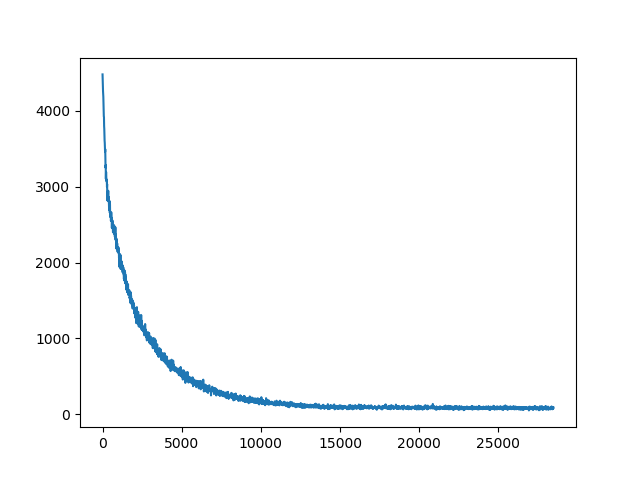

In [10]:
fig, ax = plt.subplots()
ax.plot(trainer.loss_history['iter'],trainer.loss_history['loss'])

In [11]:
vocab = trainer.dataloader.dataset.vocabulary
forward = lambda x: trainer.model.out(trainer.model.emb(x))
device = trainer.device
log10 = torch.log(torch.tensor(10,dtype=torch.float,device=device))

new_lm_file = []
for line in lm_file:
    ngram_line = re.search(r'([\-\.\d]+)\t([\w<s></s>]+[ ]?[\w<s></s>]*)([\t]?[\-\.\d]*)\n',line)
    if ngram_line is not None:
        ngram = ngram_line.groups()[1]
        if ' ' in ngram:
            w1, w2 = ngram.split(' ')
            score = forward(torch.tensor(vocab[w1],device=device))
            log_prob = max(((score[vocab[w2]] - torch.logsumexp(score,dim=0))/log10).item(),-99)
            new_line = '{:.6f}\t{}\n'.format(log_prob,ngram)
        else:
            score = forward(torch.tensor(vocab[ngram],device=device))
            log_prob = max(((score[vocab[ngram]] - torch.logsumexp(score,dim=0))/log10).item(),-99)
            new_line = '{:.6f}\t{}\t0\n'.format(log_prob,ngram)
    else:
        new_line = line
    new_lm_file.append(new_line)
    
text = ''.join(new_lm_file)
with open('./lm_files/lm_l40_word_vectors_w2_cbow', 'wb') as file:
    file.write(text.encode('iso-8859-1'))

# Prueba 2
---

In [1]:
import pandas as pd
import torch
from NLPUtils import *
import re
import fasttext

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

In [2]:
with open('./lm_files/lm_l40_bigram_train_test', 'rb') as file:
    lines = file.readlines()
    lm_file = [line.decode('iso-8859-1') for line in lines]
    
# Obtenemos el corpus de entrenamiento:
with open('trainLM2.txt', 'rb') as file:
    lines = file.readlines()
    corpus = [['<s>'] + line.decode('iso-8859-1').split(' ')[:-1] + ['</s>'] for line in lines]
    
corpus = [[token for doc in corpus for token in doc]]

In [3]:
window_size = 2           # Tamaño de la ventana del contexto.
cutoff_freq = 0           # Palabras con una frecuencia menor o igual a cutoff_freq son excluídas del vocabulario.
batch_size = 512          # Tamaño del batch.
val_size = .2

model = 'CBOW'            # Método de entrenamiento.
embedding_dim = 200       # Dimensión del espacio de los word vectors.
device = 'cuda:1'         # Dispositivo sobre el cual se entrena. 
state_dict = None         # Parámetros pre-entrenados.
paralelize = False        # Flag para decirle al programa que use las 2 gpus

train_dataset = Word2VecSamples(corpus, window_size=window_size, cutoff_freq=cutoff_freq)
test_dataset = Word2VecSamples(corpus, window_size=window_size, cutoff_freq=cutoff_freq)
model = CBOWModel(len(train_dataset.vocabulary),embedding_dim)

trainer = ModelTrainer(train_dataset, test_dataset, batch_size=batch_size, val_size=val_size)
trainer.InitModel(model=model, state_dict=state_dict, device=device)

Model trainer created:
Number of training samples: 38889 (40%)
Number of validation samples: 9723 (10%)
Number of test samples: 48612 (50%)
Number of train batches: 76
Number of samples per batch: 512

Dispositivo seleccionado: cuda:1


In [4]:
epochs = 150              # Cantidad de epochs
learning_rate = 5e-4      # Tasa de aprendizaje
sample_loss_every = 10    # Calcular la loss cada este número
algorithm = 'Adam'        # Algoritmo de optimización

trainer.Train(algorithm=algorithm, epochs=epochs, sample_loss_every=sample_loss_every, lr=learning_rate)

Starting training...
Optimization method: Adam
Learning Rate: 0.0005
Number of epochs: 150
Running on device (cuda:1)

Epoch: 1, Batch number: 0
Accuracy on validation dataset: 1/9723 (0.01%)

Epoch: 1, Batch number: 10
Accuracy on validation dataset: 33/9723 (0.34%)

Epoch: 1, Batch number: 20
Accuracy on validation dataset: 238/9723 (2.45%)

Epoch: 1, Batch number: 30
Accuracy on validation dataset: 680/9723 (6.99%)

Epoch: 1, Batch number: 40
Accuracy on validation dataset: 1157/9723 (11.90%)

Epoch: 1, Batch number: 50
Accuracy on validation dataset: 1569/9723 (16.14%)

Epoch: 1, Batch number: 60
Accuracy on validation dataset: 1833/9723 (18.85%)

Epoch: 1, Batch number: 70
Accuracy on validation dataset: 1986/9723 (20.43%)

Epoch: 2, Batch number: 4
Accuracy on validation dataset: 2074/9723 (21.33%)

Epoch: 2, Batch number: 14
Accuracy on validation dataset: 2120/9723 (21.80%)

Epoch: 2, Batch number: 24
Accuracy on validation dataset: 2157/9723 (22.18%)

Epoch: 2, Batch number: 3

Epoch: 14, Batch number: 42
Accuracy on validation dataset: 2600/9723 (26.74%)

Epoch: 14, Batch number: 52
Accuracy on validation dataset: 2598/9723 (26.72%)

Epoch: 14, Batch number: 62
Accuracy on validation dataset: 2600/9723 (26.74%)

Epoch: 14, Batch number: 72
Accuracy on validation dataset: 2605/9723 (26.79%)

Epoch: 15, Batch number: 6
Accuracy on validation dataset: 2612/9723 (26.86%)

Epoch: 15, Batch number: 16
Accuracy on validation dataset: 2620/9723 (26.95%)

Epoch: 15, Batch number: 26
Accuracy on validation dataset: 2633/9723 (27.08%)

Epoch: 15, Batch number: 36
Accuracy on validation dataset: 2640/9723 (27.15%)

Epoch: 15, Batch number: 46
Accuracy on validation dataset: 2636/9723 (27.11%)

Epoch: 15, Batch number: 56
Accuracy on validation dataset: 2641/9723 (27.16%)

Epoch: 15, Batch number: 66
Accuracy on validation dataset: 2648/9723 (27.23%)

Epoch: 16, Batch number: 0
Accuracy on validation dataset: 2648/9723 (27.23%)

Epoch: 16, Batch number: 10
Accuracy on va

Epoch: 28, Batch number: 18
Accuracy on validation dataset: 3377/9723 (34.73%)

Epoch: 28, Batch number: 28
Accuracy on validation dataset: 3390/9723 (34.87%)

Epoch: 28, Batch number: 38
Accuracy on validation dataset: 3398/9723 (34.95%)

Epoch: 28, Batch number: 48
Accuracy on validation dataset: 3409/9723 (35.06%)

Epoch: 28, Batch number: 58
Accuracy on validation dataset: 3418/9723 (35.15%)

Epoch: 28, Batch number: 68
Accuracy on validation dataset: 3432/9723 (35.30%)

Epoch: 29, Batch number: 2
Accuracy on validation dataset: 3443/9723 (35.41%)

Epoch: 29, Batch number: 12
Accuracy on validation dataset: 3454/9723 (35.52%)

Epoch: 29, Batch number: 22
Accuracy on validation dataset: 3456/9723 (35.54%)

Epoch: 29, Batch number: 32
Accuracy on validation dataset: 3466/9723 (35.65%)

Epoch: 29, Batch number: 42
Accuracy on validation dataset: 3472/9723 (35.71%)

Epoch: 29, Batch number: 52
Accuracy on validation dataset: 3486/9723 (35.85%)

Epoch: 29, Batch number: 62
Accuracy on v

Epoch: 41, Batch number: 70
Accuracy on validation dataset: 4077/9723 (41.93%)

Epoch: 42, Batch number: 4
Accuracy on validation dataset: 4069/9723 (41.85%)

Epoch: 42, Batch number: 14
Accuracy on validation dataset: 4069/9723 (41.85%)

Epoch: 42, Batch number: 24
Accuracy on validation dataset: 4078/9723 (41.94%)

Epoch: 42, Batch number: 34
Accuracy on validation dataset: 4093/9723 (42.10%)

Epoch: 42, Batch number: 44
Accuracy on validation dataset: 4112/9723 (42.29%)

Epoch: 42, Batch number: 54
Accuracy on validation dataset: 4127/9723 (42.45%)

Epoch: 42, Batch number: 64
Accuracy on validation dataset: 4129/9723 (42.47%)

Epoch: 42, Batch number: 74
Accuracy on validation dataset: 4132/9723 (42.50%)

Epoch: 43, Batch number: 8
Accuracy on validation dataset: 4128/9723 (42.46%)

Epoch: 43, Batch number: 18
Accuracy on validation dataset: 4122/9723 (42.39%)

Epoch: 43, Batch number: 28
Accuracy on validation dataset: 4133/9723 (42.51%)

Epoch: 43, Batch number: 38
Accuracy on va

Epoch: 55, Batch number: 46
Accuracy on validation dataset: 4595/9723 (47.26%)

Epoch: 55, Batch number: 56
Accuracy on validation dataset: 4603/9723 (47.34%)

Epoch: 55, Batch number: 66
Accuracy on validation dataset: 4607/9723 (47.38%)

Epoch: 56, Batch number: 0
Accuracy on validation dataset: 4609/9723 (47.40%)

Epoch: 56, Batch number: 10
Accuracy on validation dataset: 4613/9723 (47.44%)

Epoch: 56, Batch number: 20
Accuracy on validation dataset: 4617/9723 (47.49%)

Epoch: 56, Batch number: 30
Accuracy on validation dataset: 4626/9723 (47.58%)

Epoch: 56, Batch number: 40
Accuracy on validation dataset: 4631/9723 (47.63%)

Epoch: 56, Batch number: 50
Accuracy on validation dataset: 4634/9723 (47.66%)

Epoch: 56, Batch number: 60
Accuracy on validation dataset: 4627/9723 (47.59%)

Epoch: 56, Batch number: 70
Accuracy on validation dataset: 4636/9723 (47.68%)

Epoch: 57, Batch number: 4
Accuracy on validation dataset: 4649/9723 (47.81%)

Epoch: 57, Batch number: 14
Accuracy on va

Epoch: 69, Batch number: 22
Accuracy on validation dataset: 5029/9723 (51.72%)

Epoch: 69, Batch number: 32
Accuracy on validation dataset: 5038/9723 (51.82%)

Epoch: 69, Batch number: 42
Accuracy on validation dataset: 5041/9723 (51.85%)

Epoch: 69, Batch number: 52
Accuracy on validation dataset: 5041/9723 (51.85%)

Epoch: 69, Batch number: 62
Accuracy on validation dataset: 5044/9723 (51.88%)

Epoch: 69, Batch number: 72
Accuracy on validation dataset: 5041/9723 (51.85%)

Epoch: 70, Batch number: 6
Accuracy on validation dataset: 5053/9723 (51.97%)

Epoch: 70, Batch number: 16
Accuracy on validation dataset: 5057/9723 (52.01%)

Epoch: 70, Batch number: 26
Accuracy on validation dataset: 5058/9723 (52.02%)

Epoch: 70, Batch number: 36
Accuracy on validation dataset: 5052/9723 (51.96%)

Epoch: 70, Batch number: 46
Accuracy on validation dataset: 5047/9723 (51.91%)

Epoch: 70, Batch number: 56
Accuracy on validation dataset: 5047/9723 (51.91%)

Epoch: 70, Batch number: 66
Accuracy on v

Epoch: 82, Batch number: 74
Accuracy on validation dataset: 5377/9723 (55.30%)

Epoch: 83, Batch number: 8
Accuracy on validation dataset: 5381/9723 (55.34%)

Epoch: 83, Batch number: 18
Accuracy on validation dataset: 5384/9723 (55.37%)

Epoch: 83, Batch number: 28
Accuracy on validation dataset: 5381/9723 (55.34%)

Epoch: 83, Batch number: 38
Accuracy on validation dataset: 5377/9723 (55.30%)

Epoch: 83, Batch number: 48
Accuracy on validation dataset: 5375/9723 (55.28%)

Epoch: 83, Batch number: 58
Accuracy on validation dataset: 5381/9723 (55.34%)

Epoch: 83, Batch number: 68
Accuracy on validation dataset: 5382/9723 (55.35%)

Epoch: 84, Batch number: 2
Accuracy on validation dataset: 5397/9723 (55.51%)

Epoch: 84, Batch number: 12
Accuracy on validation dataset: 5396/9723 (55.50%)

Epoch: 84, Batch number: 22
Accuracy on validation dataset: 5402/9723 (55.56%)

Epoch: 84, Batch number: 32
Accuracy on validation dataset: 5399/9723 (55.53%)

Epoch: 84, Batch number: 42
Accuracy on va

Epoch: 96, Batch number: 50
Accuracy on validation dataset: 5592/9723 (57.51%)

Epoch: 96, Batch number: 60
Accuracy on validation dataset: 5603/9723 (57.63%)

Epoch: 96, Batch number: 70
Accuracy on validation dataset: 5607/9723 (57.67%)

Epoch: 97, Batch number: 4
Accuracy on validation dataset: 5607/9723 (57.67%)

Epoch: 97, Batch number: 14
Accuracy on validation dataset: 5609/9723 (57.69%)

Epoch: 97, Batch number: 24
Accuracy on validation dataset: 5609/9723 (57.69%)

Epoch: 97, Batch number: 34
Accuracy on validation dataset: 5612/9723 (57.72%)

Epoch: 97, Batch number: 44
Accuracy on validation dataset: 5608/9723 (57.68%)

Epoch: 97, Batch number: 54
Accuracy on validation dataset: 5608/9723 (57.68%)

Epoch: 97, Batch number: 64
Accuracy on validation dataset: 5615/9723 (57.75%)

Epoch: 97, Batch number: 74
Accuracy on validation dataset: 5620/9723 (57.80%)

Epoch: 98, Batch number: 8
Accuracy on validation dataset: 5636/9723 (57.97%)

Epoch: 98, Batch number: 18
Accuracy on va

Epoch: 110, Batch number: 6
Accuracy on validation dataset: 5716/9723 (58.79%)

Epoch: 110, Batch number: 16
Accuracy on validation dataset: 5718/9723 (58.81%)

Epoch: 110, Batch number: 26
Accuracy on validation dataset: 5713/9723 (58.76%)

Epoch: 110, Batch number: 36
Accuracy on validation dataset: 5719/9723 (58.82%)

Epoch: 110, Batch number: 46
Accuracy on validation dataset: 5715/9723 (58.78%)

Epoch: 110, Batch number: 56
Accuracy on validation dataset: 5721/9723 (58.84%)

Epoch: 110, Batch number: 66
Accuracy on validation dataset: 5734/9723 (58.97%)

Epoch: 111, Batch number: 0
Accuracy on validation dataset: 5719/9723 (58.82%)

Epoch: 111, Batch number: 10
Accuracy on validation dataset: 5728/9723 (58.91%)

Epoch: 111, Batch number: 20
Accuracy on validation dataset: 5726/9723 (58.89%)

Epoch: 111, Batch number: 30
Accuracy on validation dataset: 5723/9723 (58.86%)

Epoch: 111, Batch number: 40
Accuracy on validation dataset: 5728/9723 (58.91%)

Epoch: 111, Batch number: 50
A

Epoch: 123, Batch number: 38
Accuracy on validation dataset: 5800/9723 (59.65%)

Epoch: 123, Batch number: 48
Accuracy on validation dataset: 5807/9723 (59.72%)

Epoch: 123, Batch number: 58
Accuracy on validation dataset: 5813/9723 (59.79%)

Epoch: 123, Batch number: 68
Accuracy on validation dataset: 5814/9723 (59.80%)

Epoch: 124, Batch number: 2
Accuracy on validation dataset: 5814/9723 (59.80%)

Epoch: 124, Batch number: 12
Accuracy on validation dataset: 5817/9723 (59.83%)

Epoch: 124, Batch number: 22
Accuracy on validation dataset: 5825/9723 (59.91%)

Epoch: 124, Batch number: 32
Accuracy on validation dataset: 5817/9723 (59.83%)

Epoch: 124, Batch number: 42
Accuracy on validation dataset: 5812/9723 (59.78%)

Epoch: 124, Batch number: 52
Accuracy on validation dataset: 5812/9723 (59.78%)

Epoch: 124, Batch number: 62
Accuracy on validation dataset: 5813/9723 (59.79%)

Epoch: 124, Batch number: 72
Accuracy on validation dataset: 5815/9723 (59.81%)

Epoch: 125, Batch number: 6
A

Epoch: 136, Batch number: 70
Accuracy on validation dataset: 5871/9723 (60.38%)

Epoch: 137, Batch number: 4
Accuracy on validation dataset: 5881/9723 (60.49%)

Epoch: 137, Batch number: 14
Accuracy on validation dataset: 5878/9723 (60.45%)

Epoch: 137, Batch number: 24
Accuracy on validation dataset: 5872/9723 (60.39%)

Epoch: 137, Batch number: 34
Accuracy on validation dataset: 5872/9723 (60.39%)

Epoch: 137, Batch number: 44
Accuracy on validation dataset: 5875/9723 (60.42%)

Epoch: 137, Batch number: 54
Accuracy on validation dataset: 5879/9723 (60.46%)

Epoch: 137, Batch number: 64
Accuracy on validation dataset: 5880/9723 (60.48%)

Epoch: 137, Batch number: 74
Accuracy on validation dataset: 5867/9723 (60.34%)

Epoch: 138, Batch number: 8
Accuracy on validation dataset: 5868/9723 (60.35%)

Epoch: 138, Batch number: 18
Accuracy on validation dataset: 5867/9723 (60.34%)

Epoch: 138, Batch number: 28
Accuracy on validation dataset: 5868/9723 (60.35%)

Epoch: 138, Batch number: 38
A

Epoch: 150, Batch number: 26
Accuracy on validation dataset: 5905/9723 (60.73%)

Epoch: 150, Batch number: 36
Accuracy on validation dataset: 5897/9723 (60.65%)

Epoch: 150, Batch number: 46
Accuracy on validation dataset: 5897/9723 (60.65%)

Epoch: 150, Batch number: 56
Accuracy on validation dataset: 5896/9723 (60.64%)

Epoch: 150, Batch number: 66
Accuracy on validation dataset: 5896/9723 (60.64%)

Training finished



<IPython.core.display.Javascript object>


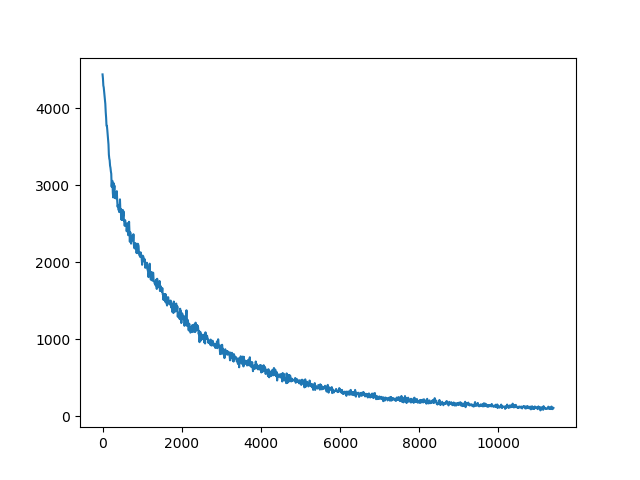

In [5]:
fig, ax = plt.subplots()
ax.plot(trainer.performance_history['iter'],trainer.performance_history['loss'])

In [6]:
window_size = 2           # Tamaño de la ventana del contexto.
cutoff_freq = 0           # Palabras con una frecuencia menor o igual a cutoff_freq son excluídas del vocabulario.
batch_size = 512          # Tamaño del batch.
val_size = .2

model = 'CBOW'            # Método de entrenamiento.
embedding_dim = 50       # Dimensión del espacio de los word vectors.
device = 'cuda:1'         # Dispositivo sobre el cual se entrena. 
state_dict = None         # Parámetros pre-entrenados.
paralelize = False        # Flag para decirle al programa que use las 2 gpus

train_dataset = Word2VecSamples(corpus, window_size=window_size, cutoff_freq=cutoff_freq)
test_dataset = Word2VecSamples(corpus, window_size=window_size, cutoff_freq=cutoff_freq)
model = CBOWModel(len(train_dataset.vocabulary),embedding_dim)

trainer = ModelTrainer(train_dataset, test_dataset, batch_size=batch_size, val_size=val_size)
trainer.InitModel(model=model, state_dict=state_dict, device=device)

Model trainer created:
Number of training samples: 38889 (40%)
Number of validation samples: 9723 (10%)
Number of test samples: 48612 (50%)
Number of train batches: 76
Number of samples per batch: 512

Dispositivo seleccionado: cuda:1


In [7]:
epochs = 150              # Cantidad de epochs
learning_rate = 5e-4      # Tasa de aprendizaje
sample_loss_every = 10    # Calcular la loss cada este número
algorithm = 'Adam'        # Algoritmo de optimización

trainer.Train(algorithm=algorithm, epochs=epochs, sample_loss_every=sample_loss_every, lr=learning_rate)

Starting training...
Optimization method: Adam
Learning Rate: 0.0005
Number of epochs: 150
Running on device (cuda:1)

Epoch: 1, Batch number: 0
Accuracy on validation dataset: 3/9723 (0.03%)

Epoch: 1, Batch number: 10
Accuracy on validation dataset: 3/9723 (0.03%)

Epoch: 1, Batch number: 20
Accuracy on validation dataset: 3/9723 (0.03%)

Epoch: 1, Batch number: 30
Accuracy on validation dataset: 9/9723 (0.09%)

Epoch: 1, Batch number: 40
Accuracy on validation dataset: 16/9723 (0.16%)

Epoch: 1, Batch number: 50
Accuracy on validation dataset: 25/9723 (0.26%)

Epoch: 1, Batch number: 60
Accuracy on validation dataset: 45/9723 (0.46%)

Epoch: 1, Batch number: 70
Accuracy on validation dataset: 68/9723 (0.70%)

Epoch: 2, Batch number: 4
Accuracy on validation dataset: 108/9723 (1.11%)

Epoch: 2, Batch number: 14
Accuracy on validation dataset: 164/9723 (1.69%)

Epoch: 2, Batch number: 24
Accuracy on validation dataset: 224/9723 (2.30%)

Epoch: 2, Batch number: 34
Accuracy on validatio

Epoch: 14, Batch number: 42
Accuracy on validation dataset: 2090/9723 (21.50%)

Epoch: 14, Batch number: 52
Accuracy on validation dataset: 2092/9723 (21.52%)

Epoch: 14, Batch number: 62
Accuracy on validation dataset: 2096/9723 (21.56%)

Epoch: 14, Batch number: 72
Accuracy on validation dataset: 2102/9723 (21.62%)

Epoch: 15, Batch number: 6
Accuracy on validation dataset: 2107/9723 (21.67%)

Epoch: 15, Batch number: 16
Accuracy on validation dataset: 2109/9723 (21.69%)

Epoch: 15, Batch number: 26
Accuracy on validation dataset: 2111/9723 (21.71%)

Epoch: 15, Batch number: 36
Accuracy on validation dataset: 2113/9723 (21.73%)

Epoch: 15, Batch number: 46
Accuracy on validation dataset: 2114/9723 (21.74%)

Epoch: 15, Batch number: 56
Accuracy on validation dataset: 2115/9723 (21.75%)

Epoch: 15, Batch number: 66
Accuracy on validation dataset: 2116/9723 (21.76%)

Epoch: 16, Batch number: 0
Accuracy on validation dataset: 2124/9723 (21.85%)

Epoch: 16, Batch number: 10
Accuracy on va

Epoch: 28, Batch number: 18
Accuracy on validation dataset: 2303/9723 (23.69%)

Epoch: 28, Batch number: 28
Accuracy on validation dataset: 2305/9723 (23.71%)

Epoch: 28, Batch number: 38
Accuracy on validation dataset: 2311/9723 (23.77%)

Epoch: 28, Batch number: 48
Accuracy on validation dataset: 2310/9723 (23.76%)

Epoch: 28, Batch number: 58
Accuracy on validation dataset: 2307/9723 (23.73%)

Epoch: 28, Batch number: 68
Accuracy on validation dataset: 2312/9723 (23.78%)

Epoch: 29, Batch number: 2
Accuracy on validation dataset: 2307/9723 (23.73%)

Epoch: 29, Batch number: 12
Accuracy on validation dataset: 2308/9723 (23.74%)

Epoch: 29, Batch number: 22
Accuracy on validation dataset: 2312/9723 (23.78%)

Epoch: 29, Batch number: 32
Accuracy on validation dataset: 2309/9723 (23.75%)

Epoch: 29, Batch number: 42
Accuracy on validation dataset: 2311/9723 (23.77%)

Epoch: 29, Batch number: 52
Accuracy on validation dataset: 2312/9723 (23.78%)

Epoch: 29, Batch number: 62
Accuracy on v

Epoch: 41, Batch number: 70
Accuracy on validation dataset: 2402/9723 (24.70%)

Epoch: 42, Batch number: 4
Accuracy on validation dataset: 2411/9723 (24.80%)

Epoch: 42, Batch number: 14
Accuracy on validation dataset: 2413/9723 (24.82%)

Epoch: 42, Batch number: 24
Accuracy on validation dataset: 2410/9723 (24.79%)

Epoch: 42, Batch number: 34
Accuracy on validation dataset: 2410/9723 (24.79%)

Epoch: 42, Batch number: 44
Accuracy on validation dataset: 2411/9723 (24.80%)

Epoch: 42, Batch number: 54
Accuracy on validation dataset: 2410/9723 (24.79%)

Epoch: 42, Batch number: 64
Accuracy on validation dataset: 2411/9723 (24.80%)

Epoch: 42, Batch number: 74
Accuracy on validation dataset: 2415/9723 (24.84%)

Epoch: 43, Batch number: 8
Accuracy on validation dataset: 2418/9723 (24.87%)

Epoch: 43, Batch number: 18
Accuracy on validation dataset: 2421/9723 (24.90%)

Epoch: 43, Batch number: 28
Accuracy on validation dataset: 2426/9723 (24.95%)

Epoch: 43, Batch number: 38
Accuracy on va

Epoch: 55, Batch number: 46
Accuracy on validation dataset: 2576/9723 (26.49%)

Epoch: 55, Batch number: 56
Accuracy on validation dataset: 2583/9723 (26.57%)

Epoch: 55, Batch number: 66
Accuracy on validation dataset: 2587/9723 (26.61%)

Epoch: 56, Batch number: 0
Accuracy on validation dataset: 2590/9723 (26.64%)

Epoch: 56, Batch number: 10
Accuracy on validation dataset: 2595/9723 (26.69%)

Epoch: 56, Batch number: 20
Accuracy on validation dataset: 2595/9723 (26.69%)

Epoch: 56, Batch number: 30
Accuracy on validation dataset: 2602/9723 (26.76%)

Epoch: 56, Batch number: 40
Accuracy on validation dataset: 2607/9723 (26.81%)

Epoch: 56, Batch number: 50
Accuracy on validation dataset: 2611/9723 (26.85%)

Epoch: 56, Batch number: 60
Accuracy on validation dataset: 2608/9723 (26.82%)

Epoch: 56, Batch number: 70
Accuracy on validation dataset: 2610/9723 (26.84%)

Epoch: 57, Batch number: 4
Accuracy on validation dataset: 2608/9723 (26.82%)

Epoch: 57, Batch number: 14
Accuracy on va

Epoch: 69, Batch number: 22
Accuracy on validation dataset: 2832/9723 (29.13%)

Epoch: 69, Batch number: 32
Accuracy on validation dataset: 2830/9723 (29.11%)

Epoch: 69, Batch number: 42
Accuracy on validation dataset: 2833/9723 (29.14%)

Epoch: 69, Batch number: 52
Accuracy on validation dataset: 2837/9723 (29.18%)

Epoch: 69, Batch number: 62
Accuracy on validation dataset: 2838/9723 (29.19%)

Epoch: 69, Batch number: 72
Accuracy on validation dataset: 2841/9723 (29.22%)

Epoch: 70, Batch number: 6
Accuracy on validation dataset: 2848/9723 (29.29%)

Epoch: 70, Batch number: 16
Accuracy on validation dataset: 2846/9723 (29.27%)

Epoch: 70, Batch number: 26
Accuracy on validation dataset: 2850/9723 (29.31%)

Epoch: 70, Batch number: 36
Accuracy on validation dataset: 2855/9723 (29.36%)

Epoch: 70, Batch number: 46
Accuracy on validation dataset: 2858/9723 (29.39%)

Epoch: 70, Batch number: 56
Accuracy on validation dataset: 2860/9723 (29.41%)

Epoch: 70, Batch number: 66
Accuracy on v

Epoch: 82, Batch number: 74
Accuracy on validation dataset: 3082/9723 (31.70%)

Epoch: 83, Batch number: 8
Accuracy on validation dataset: 3084/9723 (31.72%)

Epoch: 83, Batch number: 18
Accuracy on validation dataset: 3080/9723 (31.68%)

Epoch: 83, Batch number: 28
Accuracy on validation dataset: 3086/9723 (31.74%)

Epoch: 83, Batch number: 38
Accuracy on validation dataset: 3085/9723 (31.73%)

Epoch: 83, Batch number: 48
Accuracy on validation dataset: 3094/9723 (31.82%)

Epoch: 83, Batch number: 58
Accuracy on validation dataset: 3093/9723 (31.81%)

Epoch: 83, Batch number: 68
Accuracy on validation dataset: 3099/9723 (31.87%)

Epoch: 84, Batch number: 2
Accuracy on validation dataset: 3104/9723 (31.92%)

Epoch: 84, Batch number: 12
Accuracy on validation dataset: 3104/9723 (31.92%)

Epoch: 84, Batch number: 22
Accuracy on validation dataset: 3105/9723 (31.93%)

Epoch: 84, Batch number: 32
Accuracy on validation dataset: 3112/9723 (32.01%)

Epoch: 84, Batch number: 42
Accuracy on va

Epoch: 96, Batch number: 50
Accuracy on validation dataset: 3304/9723 (33.98%)

Epoch: 96, Batch number: 60
Accuracy on validation dataset: 3307/9723 (34.01%)

Epoch: 96, Batch number: 70
Accuracy on validation dataset: 3307/9723 (34.01%)

Epoch: 97, Batch number: 4
Accuracy on validation dataset: 3313/9723 (34.07%)

Epoch: 97, Batch number: 14
Accuracy on validation dataset: 3314/9723 (34.08%)

Epoch: 97, Batch number: 24
Accuracy on validation dataset: 3308/9723 (34.02%)

Epoch: 97, Batch number: 34
Accuracy on validation dataset: 3304/9723 (33.98%)

Epoch: 97, Batch number: 44
Accuracy on validation dataset: 3299/9723 (33.93%)

Epoch: 97, Batch number: 54
Accuracy on validation dataset: 3306/9723 (34.00%)

Epoch: 97, Batch number: 64
Accuracy on validation dataset: 3313/9723 (34.07%)

Epoch: 97, Batch number: 74
Accuracy on validation dataset: 3326/9723 (34.21%)

Epoch: 98, Batch number: 8
Accuracy on validation dataset: 3323/9723 (34.18%)

Epoch: 98, Batch number: 18
Accuracy on va

Epoch: 110, Batch number: 16
Accuracy on validation dataset: 3512/9723 (36.12%)

Epoch: 110, Batch number: 26
Accuracy on validation dataset: 3519/9723 (36.19%)

Epoch: 110, Batch number: 36
Accuracy on validation dataset: 3516/9723 (36.16%)

Epoch: 110, Batch number: 46
Accuracy on validation dataset: 3522/9723 (36.22%)

Epoch: 110, Batch number: 56
Accuracy on validation dataset: 3526/9723 (36.26%)

Epoch: 110, Batch number: 66
Accuracy on validation dataset: 3528/9723 (36.29%)

Epoch: 111, Batch number: 0
Accuracy on validation dataset: 3526/9723 (36.26%)

Epoch: 111, Batch number: 10
Accuracy on validation dataset: 3517/9723 (36.17%)

Epoch: 111, Batch number: 20
Accuracy on validation dataset: 3524/9723 (36.24%)

Epoch: 111, Batch number: 30
Accuracy on validation dataset: 3523/9723 (36.23%)

Epoch: 111, Batch number: 40
Accuracy on validation dataset: 3521/9723 (36.21%)

Epoch: 111, Batch number: 50
Accuracy on validation dataset: 3519/9723 (36.19%)

Epoch: 111, Batch number: 60


Epoch: 123, Batch number: 48
Accuracy on validation dataset: 3692/9723 (37.97%)

Epoch: 123, Batch number: 58
Accuracy on validation dataset: 3700/9723 (38.05%)

Epoch: 123, Batch number: 68
Accuracy on validation dataset: 3699/9723 (38.04%)

Epoch: 124, Batch number: 2
Accuracy on validation dataset: 3707/9723 (38.13%)

Epoch: 124, Batch number: 12
Accuracy on validation dataset: 3703/9723 (38.08%)

Epoch: 124, Batch number: 22
Accuracy on validation dataset: 3707/9723 (38.13%)

Epoch: 124, Batch number: 32
Accuracy on validation dataset: 3713/9723 (38.19%)

Epoch: 124, Batch number: 42
Accuracy on validation dataset: 3713/9723 (38.19%)

Epoch: 124, Batch number: 52
Accuracy on validation dataset: 3717/9723 (38.23%)

Epoch: 124, Batch number: 62
Accuracy on validation dataset: 3718/9723 (38.24%)

Epoch: 124, Batch number: 72
Accuracy on validation dataset: 3717/9723 (38.23%)

Epoch: 125, Batch number: 6
Accuracy on validation dataset: 3728/9723 (38.34%)

Epoch: 125, Batch number: 16
A

Epoch: 137, Batch number: 4
Accuracy on validation dataset: 3887/9723 (39.98%)

Epoch: 137, Batch number: 14
Accuracy on validation dataset: 3894/9723 (40.05%)

Epoch: 137, Batch number: 24
Accuracy on validation dataset: 3893/9723 (40.04%)

Epoch: 137, Batch number: 34
Accuracy on validation dataset: 3894/9723 (40.05%)

Epoch: 137, Batch number: 44
Accuracy on validation dataset: 3889/9723 (40.00%)

Epoch: 137, Batch number: 54
Accuracy on validation dataset: 3887/9723 (39.98%)

Epoch: 137, Batch number: 64
Accuracy on validation dataset: 3893/9723 (40.04%)

Epoch: 137, Batch number: 74
Accuracy on validation dataset: 3900/9723 (40.11%)

Epoch: 138, Batch number: 8
Accuracy on validation dataset: 3893/9723 (40.04%)

Epoch: 138, Batch number: 18
Accuracy on validation dataset: 3895/9723 (40.06%)

Epoch: 138, Batch number: 28
Accuracy on validation dataset: 3897/9723 (40.08%)

Epoch: 138, Batch number: 38
Accuracy on validation dataset: 3895/9723 (40.06%)

Epoch: 138, Batch number: 48
A

Epoch: 150, Batch number: 36
Accuracy on validation dataset: 4041/9723 (41.56%)

Epoch: 150, Batch number: 46
Accuracy on validation dataset: 4044/9723 (41.59%)

Epoch: 150, Batch number: 56
Accuracy on validation dataset: 4045/9723 (41.60%)

Epoch: 150, Batch number: 66
Accuracy on validation dataset: 4044/9723 (41.59%)

Training finished



In [ ]:
fig, ax = plt.subplots()
ax.plot(trainer.performance_history['iter'],trainer.performance_history['loss'])